In [1]:
!pip -q install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d fusicfenta/chest-xray-for-covid19-detection

 96% 169M/176M [00:00<00:00, 203MB/s]
100% 176M/176M [00:01<00:00, 184MB/s]


In [5]:
!unzip "/content/chest-xray-for-covid19-detection.zip"

Archive:  /content/chest-xray-for-covid19-detection.zip
  inflating: Dataset/Prediction/NORMAL2-IM-0338-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0339-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0352-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0353-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0357-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0370-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0372-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.2420351

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
x_train=train_datagen.flow_from_directory("/content/Dataset/Train",target_size=(64,64),class_mode='binary',batch_size=100)

Found 288 images belonging to 2 classes.


In [10]:
x_test=test_datagen.flow_from_directory("/content/Dataset/Val",target_size=(64,64),class_mode='binary',batch_size=100)

Found 60 images belonging to 2 classes.


Model_building

In [11]:
#cnn model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten




In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),strides=(1,1),activation="relu",input_shape=(64,64,3)))#convolution
model.add(MaxPooling2D(pool_size=(2,2)))#pooling
model.add(Flatten())#flatten

model.add(Dense(300,activation="relu"))#hidden Layer1

model.add(Dense(150,activation="relu"))#hidden Layer2


model.add(Dense(1,activation='sigmoid')) #output layer

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=30,validation_data = x_test,validation_steps = len(x_test))

Epoch 1/30
3/3 [==============================] - 13s 5s/step - loss: 1.8578 - accuracy: 0.4375 - val_loss: 1.2755 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 10s 4s/step - loss: 0.7839 - accuracy: 0.5625 - val_loss: 0.4267 - val_accuracy: 0.9333
Epoch 3/30
3/3 [==============================] - 12s 4s/step - loss: 0.4959 - accuracy: 0.7674 - val_loss: 0.3054 - val_accuracy: 0.9333
Epoch 4/30
3/3 [==============================] - 10s 4s/step - loss: 0.3812 - accuracy: 0.8125 - val_loss: 0.2373 - val_accuracy: 0.9333
Epoch 5/30
3/3 [==============================] - 10s 3s/step - loss: 0.2743 - accuracy: 0.9201 - val_loss: 0.1703 - val_accuracy: 0.9500
Epoch 6/30
3/3 [==============================] - 10s 4s/step - loss: 0.2211 - accuracy: 0.9201 - val_loss: 0.1988 - val_accuracy: 0.9500
Epoch 7/30
3/3 [==============================] - 10s 3s/step - loss: 0.1768 - accuracy: 0.9549 - val_loss: 0.1050 - val_accuracy: 0.9500
Epoch 8/30
3/3 [==================

In [16]:
#save the model

model.save("covid.h5")

In [17]:
#testing data
from tensorflow.keras.preprocessing import image
import numpy as np

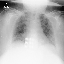

In [18]:
img=image.load_img("/content/Dataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg",target_size=(64,64))
img

In [19]:
x=image.img_to_array(img)

In [20]:
x=np.expand_dims(x,axis=0)
y = (model.predict(x) > 0.5).astype(int)
if(y==1):
  print("Normal")
else:
  print("Covid")

1/1 [==============================] - 0s 157ms/step
Covid


In [21]:
#testing 2
img=image.load_img("/content/Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y = (model.predict(x) > 0.5).astype(int)
if(y==1):
  print("Normal")
else:
  print("Covid")

1/1 [==============================] - 0s 29ms/step
Normal
